CSV Header: ['Date', 'Close']
CSV Header: ['Date', 'Close']


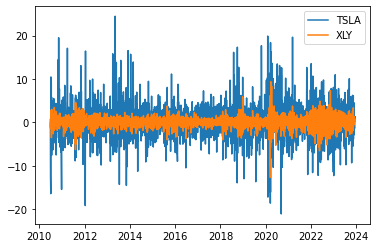

,Delta_x,Delta_y
Date,,
2023-12-08,0.494560,0.458241
2023-12-07,1.366086,0.824603
2023-12-06,0.272286,0.146421
2023-12-05,1.332881,0.176017
2023-12-04,-1.360801,-0.379914
...,...,...
2010-07-06,-16.406250,0.000000
2010-07-02,-12.328767,-1.123595
2010-07-01,-8.176101,0.823900


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import csv
from datetime import datetime
import numpy as np  
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

tsla = 'c:/Users/wston/Documents/tsla_full.csv'
xly = 'c:/users/wston/Documents/xly.csv'
tsla1 = 'c:/users/wston/Documents/tsla1.csv'
xly1 = 'c:/users/wston/Documents/xly1.csv'

tsla_prof={'Date':[],'Close':[]}
xly_prof={'Date':[],'Close':[]}

with open(tsla, newline='') as tsla_read:
    tsla_reader = csv.reader(tsla_read, delimiter=',')

    tsla_header = next(tsla_reader)
    print(f"CSV Header: {tsla_header[0::1]}")

    with open(tsla1, mode='w') as tsla_out:
        tsla_writer = csv.writer(tsla_out)
        tsla_prof = {jump[0]:jump[1] for jump in tsla_reader}

        for i,k in tsla_reader:
            tsla_prof['Date'].append(
    	        {
                    (i[0:]),
                    
                }
        )  
            tsla_prof['Close'].append(
                {
                    (k[::1])
                    
                }
                    
        ) 

t_chunklen = 1
t_list = list(tsla_prof.items())
td = [dict(t_list[i:i + t_chunklen]) for i in range(0, len(t_list), t_chunklen)]


with open(xly, newline='') as xly_read:
    xly_reader = csv.reader(xly_read, delimiter=',') 

    xly_header = next(xly_reader)
    print(f"CSV Header: {xly_header[0::1]}")

    with open(xly1, mode='w') as xly_out:
        xly_writer = csv.writer(xly_out)
        xly_prof = {roll[0]:roll[1] for roll in xly_reader}

        for x,y in xly_reader:
            xly_prof['Date'].append(
    	        {
                    (x[0:]),
                    
                }
        )  
            xly_prof['Close'].append(
                {
                    (y[::1])
                    
                }
        ) 
        
v_chunklen = 1
v_list = list(xly_prof.items())
vd = [dict(v_list[l:l + v_chunklen]) for l in range(0, len(v_list), v_chunklen)]


t_df = pd.DataFrame(t_list)
v_df = pd.DataFrame(v_list)

t_df.columns = ['Date', 'Close']
v_df.columns = ['Date', 'Close']

t_df['Date'] = pd.to_datetime(t_df["Date"])
t_df['Close'] = t_df['Close'].astype(float)
t_df['Close'].astype(int)

v_df['Date'] = pd.to_datetime(v_df["Date"])
v_df['Close'] = v_df['Close'].astype(float)
v_df['Close'].astype(int)
 
t_df.set_index('Date', inplace=True)
v_df.set_index('Date', inplace=True)

t_df['Delta'] = t_df['Close'].pct_change(periods=-1)*100
v_df['Delta'] = v_df['Close'].pct_change(periods=-1)*100

m_delta = pd.merge(t_df['Delta'],v_df['Delta'],how='inner',left_index=True,right_index=True)

bingo = plt.plot(m_delta.index,m_delta['Delta_x'],m_delta['Delta_y'])
plt.legend(iter(bingo),('TSLA', 'XLY'))
plt.show()

m_delta



In [2]:
m_df= pd.merge(t_df['Close'],v_df['Close'],how='inner',left_index=True,right_index=True)
m_df
df_reg = m_df[['Close_x','Close_y']].copy()
df_reg.dropna(axis='columns')
df_reg.reset_index(drop=True, inplace=True)
df_reg

,Close_x,Close_y
0,243.84,173.190002
1,242.64,172.399994
2,239.37,170.990005
3,238.72,170.740005
4,235.58,170.440002
...,...,...
3381,1.07,29.040001
3382,1.28,29.040001
3383,1.46,29.370001
3384,1.59,29.129999


In [3]:
X=df_reg[['Close_x']]
y=df_reg[['Close_y']]

regressor = LinearRegression()
regressor.fit(X, y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_) 

Weight coefficients:  [[0.3990982]]
y-axis intercept:  [69.82213629]


In [4]:
predictions = regressor.predict(X)

print(f"True output: {y['Close_y'][0]}")
print(f"Predicted output: {predictions[0][0]}")
print(f"Prediction Error: {predictions[0][0]-y['Close_y'][0]}")

True output: 173.190002
Predicted output: 167.1382402311099
Prediction Error: -6.051761768890088


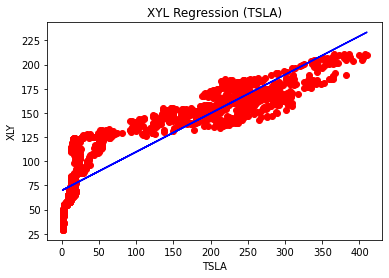

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('XYL Regression (TSLA)')
plt.xlabel('TSLA')
plt.ylabel('XLY')
plt.show()

In [6]:
yy=y.to_numpy()
yy=yy.flatten()
predictions_prime=predictions.flatten()
df_pred=pd.DataFrame({'Predictions': predictions_prime, 'Actual': yy, 'Error': predictions_prime-yy})
df_pred

,Predictions,Actual,Error
0,167.138240,173.190002,-6.051762
1,166.659322,172.399994,-5.740672
2,165.354271,170.990005,-5.635734
3,165.094857,170.740005,-5.645148
4,163.841689,170.440002,-6.598313
...,...,...,...
3381,70.249171,29.040001,41.209170
3382,70.332982,29.040001,41.292981
3383,70.404820,29.370001,41.034819
3384,70.456702,29.129999,41.326703


In [7]:
x_min = X.min()
x_max = X.max()

y_min_actual = y.min()
y_max_actual = y.max()

In [8]:
y_min = 69.82213629 + 0.3990982 * x_min
y_max = 69.82213629 + 0.3990982 * x_max
print(f"Actual Min Value: {y_min_actual[0]}")
print(f"Calculated Min Value: {y_min[0]}")
print(f"Actual Max Value: {y_max_actual[0]}")
print(f"Calculated Max Value: {y_max[0]}")

Actual Min Value: 29.040001
Calculated Min Value: 70.2411894
Actual Max Value: 211.419998
Calculated Max Value: 233.44042534400003


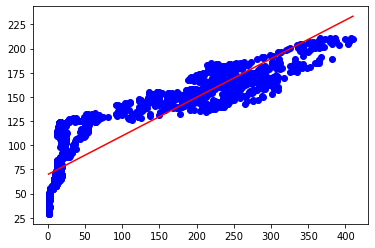

In [9]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [10]:
# Use our model to predict a value
predicted = regressor.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(yy, predicted)
r2 = r2_score(yy, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 503.8773750712752
R-squared (R2 ): 0.7633358779138033


In [11]:
regressor.score(X, y)

0.7633358779138033

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7848301710479224